In [1]:
from datetime import datetime
import utils.general as ge
reload(ge)

import os

modelType = 'dilated3DNetForNii'

outputDir = os.path.join('../forOnceRunning/', modelType)
ge.makeDir(outputDir)

timeString = datetime.now().strftime('%y-%m-%d_%H:%M:%S')
onceRunningDir = os.path.join(outputDir, timeString)
ge.makeDir(onceRunningDir)

testResultDir = os.path.join(onceRunningDir, 'testResult')
ge.makeDir(testResultDir)

testResultDir2 = os.path.join(onceRunningDir, 'testResult2')
ge.makeDir(testResultDir2)

valResultDir = os.path.join(onceRunningDir, 'valResult')
ge.makeDir(valResultDir)

weightDir = os.path.join(onceRunningDir, 'weight')
ge.makeDir(weightDir)

logFileName = timeString + '{}.log'.format(modelType)
logFileName = os.path.join(onceRunningDir, logFileName)

print logFileName

import logging
logging.basicConfig(filename = logFileName, 
                    filemode='w', 
                    format = '%(name)s %(lineno)d %(levelname)s:%(message)s', 
                    level = logging.INFO)
logger = logging.getLogger('Jupyter Notebook')

../forOnceRunning/dilated3DNetForNii/17-08-31_22:06:48/17-08-31_22:06:48dilated3DNetForNii.log


In [2]:
import utils.createROIMaskForNii as crn
reload(crn)
# import utils.sampling as sp
# reload(sp)
# import models.baseNet as bn
# reload(bn)
# from models.Layers import DilatedConv3DLayer
import generateTrainTestNetworkForNiiData as gtt

import time
import theano
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
# from tqdm import tqdm_notebook

%matplotlib inline 

Using cuDNN version 6020 on context None
Mapped name None to device cuda0: GeForce GTX 750 Ti (0000:01:00.0)


In [3]:
reload(gtt)

<module 'generateTrainTestNetworkForNiiData' from 'generateTrainTestNetworkForNiiData.pyc'>

In [4]:
configFile = '/home/mountain/Desktop/BrainNets/code/configs/{}.cfg'.format(modelType)

In [5]:
configFile

'/home/mountain/Desktop/BrainNets/code/configs/dilated3DNetForNii.cfg'

In [6]:
baseNet = gtt.generateNetwork(configFile, onceRunningDir)

Shape.0 Subtensor{int64}.0


In [7]:
trainTRowList, valTRowList = gtt.trainNetwork(baseNet, configFile)

Shape.0 Subtensor{int64}.0


In [8]:
trainLossList = []
trainACCList = []

for row in trainTRowList:
    if isinstance(row[1], int):
        trainLossList.append(row[3])
        trainACCList.append(row[4])

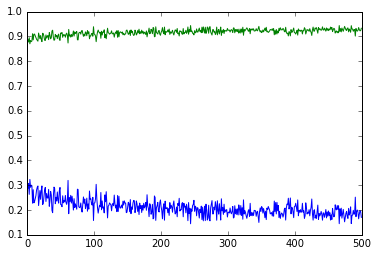

In [9]:
plt.plot(trainLossList)
plt.plot(trainACCList)
plt.show()

In [10]:
valCTDiceList = []
valCTSensList = []
valCTSpecList = []

valCoreDiceList = []
valCoreSensList = []
valCoreSpecList = []

valEhDiceList = []
valEhSensList = []
valEhSpecList = []

for row in valTRowList:
    if isinstance(row[1], int):
        valCTDiceList.append(row[3])
        valCTSensList.append(row[4])
        valCTSpecList.append(row[5])

        valCoreDiceList.append(row[6])
        valCoreSensList.append(row[7])
        valCoreSpecList.append(row[8])

        valEhDiceList.append(row[9])
        valEhSensList.append(row[10])
        valEhSpecList.append(row[11])

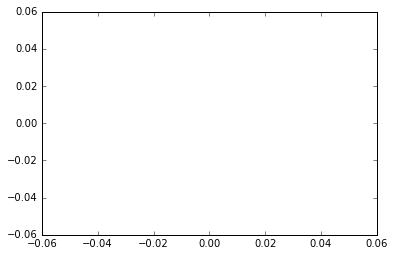

In [11]:
plt.plot(valCTDiceList)
plt.plot(valCoreDiceList)
plt.plot(valEhDiceList)
plt.show()

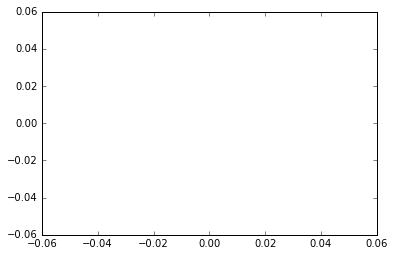

In [12]:
plt.plot(valCTSensList)
plt.plot(valCoreSensList)
plt.plot(valEhSensList)
plt.show()

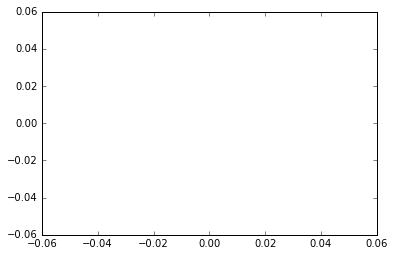

In [13]:
plt.plot(valCTSpecList)
plt.plot(valCoreSpecList)
plt.plot(valEhSpecList)
plt.show()

In [14]:
reload(gtt)

<module 'generateTrainTestNetworkForNiiData' from 'generateTrainTestNetworkForNiiData.pyc'>

In [7]:
gtt.testNetwork(baseNet, configFile)

Shape.0 Subtensor{int64}.0


In [ ]:
configFile2 = '/home/mountain/Desktop/BrainNets/code/configs/{}2.cfg'.format(modelType)

In [ ]:
baseNet2 = gtt.generateNetwork(configFile2, onceRunningDir)

In [ ]:
trainTRowList2, valTRowList2 = gtt.trainNetwork(baseNet2, configFile2)

In [ ]:
gtt.testNetwork(baseNet2, configFile2)

In [ ]:
os.path.join('/abc', 'ds')

In [ ]:
dataPath = '/home/mountain/Desktop/BrainNets/data/BRATS2015_Training'

In [ ]:
dataPath = '/home/mountain/Desktop/BrainNets/data/SimpleExploreSomeData'

In [ ]:
outputPath = '/home/mountain/Desktop/BrainNets/data/normTrainingDataWithROI'

In [ ]:
cr.normAndCreateROIForAllFiles(dataPath, outputPath)

In [ ]:
import utils.createROIMaskForNii as crn
reload(crn)

In [ ]:
dataPath = '/home/mountain/Desktop/BrainNets/data/SimpleExploreSomeNiiData'

In [ ]:
dataPath = '/home/mountain/Desktop/BrainNets/data/Brats17TrainingData'

In [ ]:
outputPath = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI'

In [ ]:
crn.normAndCreateROIForAllFiles(dataPath, outputPath)

In [ ]:
testDataPath  ='/home/mountain/Desktop/BrainNets/data/Brats17ValidationData'

In [ ]:
testDataOutputPath = '/home/mountain/Desktop/BrainNets/data/normNiiTestDataWithROI'

In [ ]:
crn.normAndCreateROIForAllFiles(testDataPath, testDataOutputPath, True)

In [ ]:
testDataPath  ='/home/mountain/Desktop/BrainNets/data/Testing'

In [ ]:
testDataOutputPath = '/home/mountain/Desktop/BrainNets/data/normTestDataWithROI'

In [ ]:
cr.normAndCreateROIForAllFiles(testDataPath, testDataOutputPath, True)

In [ ]:
a = []

In [ ]:
a[2:3]

In [ ]:
a[0]

In [ ]:
import utils.loadNiiData as lni
reload(lni)

In [ ]:
patientDir = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI/HGG/Brats17_2013_13_1'

In [ ]:
arrays = lni.loadSinglePatientData(patientDir)

In [ ]:
image = arrays[0]

In [ ]:
image.shape

In [ ]:
import utils.sampleNii as sni
reload(sni)

In [ ]:
samples = sni.sampleWholeBrain(patientDir, 
                               'normImage', 
                               ['t1ce', 't1', 't2', 'flair'], 
                               [17, 17, 17], 
                               15,
                               False, 
                               True)

In [ ]:
len(samples)

In [ ]:
len(samples[0])

In [ ]:
samples[-1]

In [ ]:
del samples

In [ ]:
patientsDirList = []

In [ ]:
patientsDirList.append(patientDir)

In [ ]:
samples = sni.getSamplesForSubEpoch(100,
                          patientsDirList,
                          useROI = True,
                          modals = ['t1ce', 't1', 't2', 'flair'],
                          normType = 'normImage',
                          trainSampleSize = [25, 25, 25],
                          receptiveField = 17,
                          weightMapType = 0,
                          parallel = False)

In [ ]:
len(samples[0])

In [ ]:
samples[0][0].shape

In [ ]:
import nibabel as nib
import numpy as np

In [ ]:
seg = '/home/mountain/Desktop/BrainNets/data/Brats17TrainingData/HGG/Brats17_2013_7_1/Brats17_2013_7_1_seg.nii.gz'

In [ ]:
tice = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI/HGG/Brats17_2013_13_1/normBrainBrats17_2013_13_1_t1ce.nii.gz'

In [ ]:
tice = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI/HGG/Brats17_2013_13_1/normImageBrats17_2013_13_1_t1ce.nii.gz'

In [ ]:
roi = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI/HGG/Brats17_2013_13_1/Brats17_2013_13_1.ROI.nii.gz'

In [ ]:
new = '/home/mountain/Desktop/BrainNets/data/normNiiTrainingDataWithROI/HGG/Brats17_2013_19_1/normImageBrats17_2013_19_1_flair.nii.gz'

In [ ]:
image = nib.load(new)

In [ ]:
array = image.get_data()

In [ ]:
ROIBoolArray = array > 0
ROIArray = ROIBoolArray.astype('int16')

In [ ]:
ROIArray.dtype

In [ ]:
ROIImage = nib.Nifti1Image(ROIArray, image.affine)

In [ ]:
array[1,2,3]

In [ ]:
ar = ROIImage.get_data()

In [ ]:
ar.dtype

In [ ]:
patientName = '/home/mountain/Desktop/'
# Name the ROI file
ROIFileName = patientName + 'ROI.nii'
nib.save(ROIImage, ROIFileName)

In [ ]:
reLoadImage = '/home/mountain/Desktop/ROI.nii'

In [ ]:
reimage = nib.load(reLoadImage)

In [ ]:
reArray = reimage.get_data()

In [ ]:
reArray.dtype

In [ ]:
array

In [ ]:
b = array.astype('float32')

In [ ]:
b == array

In [ ]:
array.dtype

In [ ]:
def numpyArrayCounter(numpyArray):

    unique, counts = np.unique(numpyArray, return_counts = True)

    return np.asarray((unique, counts)).T

In [ ]:
count = numpyArrayCounter(array)

In [ ]:
count